In [1]:
import math
import random
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm

import numpy as np
import numba
import numpy.random
from collections import deque

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.optimizers import Adam

In [2]:
class LineWorld:
    def __init__(self, nb_cells, start_cell, good_end_cell, bad_end_cell):
        self.done = None
        self.current_state = start_cell  # État actuel
        self.end_good_state = good_end_cell # État final
        self.end_bad_state = bad_end_cell
        self.reward = 0.0
        self.num_states = nb_cells  # Nombre total d'états
        self.states = [i for i in range(nb_cells)]
        self.actions = [0, 1]
        self.num_actions = 2  # Nombre total d'actions possibles
        self.line_world = ["_"] * (self.num_states - 1)
        self.line_world.insert(self.current_state,"X")
        

    def reset(self):
        self.reward = 0.0
        self.done = False
        self.current_state = np.random.randint(1,8)
        
    def isTerminateState(self):
        if (self.current_state == self.end_good_state) or (self.current_state == self.end_bad_state):
            return True
        else:
            return False
        
    def step(self, action):
        # Si l'action est 1, on avance à droite
        if (action == 1):
            self.current_state += 1
            self.reward = 0  # Pas de récompense pour avancer
            self.line_world.remove("X")
            self.line_world.insert(self.current_state,"X")
            print(self.line_world)
        # Si l'action est 0, on avance à gauche
        elif (action == 0):
            self.current_state-= 1
            self.reward = 0  # Pas de récompense pour avancer
            self.line_world.remove("X")
            self.line_world.insert(self.current_state, "X")
            print(self.line_world)
        # Si l'on atteint l'état final, la partie est terminée
        if self.current_state == self.end_good_state:
            self.reward = 1  # Récompense de 1 pour atteindre l'état final
            #print(self.line_world)
            self.done = True
        elif self.current_state == self.end_bad_state:
            self.reward = -1
            #print(self.line_world)
            self.done = True
        return self.current_state, self.reward, self.done
        
            

In [3]:
def build_compile_model(line):
    model = tf.keras.models.Sequential()
    model.add(Dense(24, input_dim=1, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(len(line.actions), activation='linear'))

    model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
    return model

In [4]:
def dqn(line, episodes=1000, gamma=0.99, alpha=0.1, epsilon=0.1):
    q_network = build_compile_model(line)
    nb_steps = 0
    first_episode = True
    
    step = 0
    reward = 0
    reward_per_episode = []
    step_by_episode = []
    
    for episode in range(episodes):
        line.reset()
        print("Episode : ", episode)
        cumumated_reward = 0
        done = False
        current_state = line.current_state
        while not done:
            actions = line.actions

            q_values = q_network.predict(np.array([current_state]))[0]
            if np.random.rand() < epsilon:
                a = np.random.choice(actions)
            else:
                a= np.argmax(q_values)

            old_reward = line.reward
            new_state, reward, done = line.step(a)
            print(done)

            q_values[a] = reward + gamma * np.amax(q_network.predict(np.array([new_state]))[0])
            q_network.fit(np.array([current_state]), np.array([q_values]), verbose=0)
            current_state = new_state
            
            step += 1
            print(step)
            if done:
                reward_per_episode.append(reward)
        print(reward_per_episode)
    return reward_per_episode

Episode :  0
1/1 [==============================] - 0s 93ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 24ms/step
1
1/1 [==============================] - 0s 43ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 46ms/step
2
1/1 [==============================] - 0s 23ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
3
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 41ms/step
4
1/1 [==============================] - 0s 23ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 21ms/step
5
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 22ms/step
6
[1]
Episod

1/1 [==============================] - 0s 29ms/step
['_', '_', '_', 'X', '_', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 32ms/step
49
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 22ms/step
50
1/1 [==============================] - 0s 34ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
51
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 26ms/step
52
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
53
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 33ms/step
54
1/1 [===========

1/1 [==============================] - 0s 28ms/step
96
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
97
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
98
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 21ms/step
99
1/1 [==============================] - 0s 37ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 22ms/step
100
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Episode :  18
1/1 [==============================] - 0s 26ms/step
['_', '_', '_', 'X', '_', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 22ms/step
101
1/1 [==============================] - 0s 26ms/step
['_

1/1 [==============================] - 0s 54ms/step
142
1/1 [==============================] - 0s 23ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 24ms/step
143
1/1 [==============================] - 0s 36ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 31ms/step
144
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Episode :  26
1/1 [==============================] - 0s 27ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
145
1/1 [==============================] - 0s 23ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 23ms/step
146
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 38ms/step
147
1/1 [======================

1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 26ms/step
187
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 26ms/step
188
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 27ms/step
189
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 22ms/step
190
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 24ms/step
191
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Episode :  35
1/1 [==============================] - 0s 21ms/step
['_'

1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 23ms/step
231
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Episode :  42
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
232
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 35ms/step
233
1/1 [==============================] - 0s 25ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 23ms/step
234
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 23ms/step
235
1/1 [==============================

1/1 [==============================] - 0s 22ms/step
274
1/1 [==============================] - 0s 27ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 25ms/step
275
1/1 [==============================] - 0s 37ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
276
1/1 [==============================] - 0s 27ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
277
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
278
1/1 [==============================] - 0s 23ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 31ms/step
279
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [======

1/1 [==============================] - 0s 33ms/step
['_', '_', 'X', '_', '_', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 20ms/step
317
1/1 [==============================] - 0s 26ms/step
['_', '_', '_', 'X', '_', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 22ms/step
318
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 22ms/step
319
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 22ms/step
320
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 23ms/step
321
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 37ms/step
322
1/1 [=====

1/1 [==============================] - 0s 27ms/step
359
1/1 [==============================] - 0s 25ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 22ms/step
360
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 34ms/step
361
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Episode :  63
1/1 [==============================] - 0s 21ms/step
['_', '_', 'X', '_', '_', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 25ms/step
362
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', 'X', '_', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 21ms/step
363
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', 'X', '_'

398
1/1 [==============================] - 0s 34ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 23ms/step
399
1/1 [==============================] - 0s 23ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 26ms/step
400
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Episode :  71
1/1 [==============================] - 0s 32ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 32ms/step
401
1/1 [==============================] - 0s 46ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 39ms/step
402
1/1 [==============================] - 0s 46ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False


1/1 [==============================] - 0s 24ms/step
438
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 35ms/step
439
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 25ms/step
440
1/1 [==============================] - 0s 32ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 25ms/step
441
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Episode :  78
1/1 [==============================] - 0s 29ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 27ms/step
442
1/1 [==============================]

1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 23ms/step
477
1/1 [==============================] - 0s 36ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 28ms/step
478
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 23ms/step
479
1/1 [==============================] - 0s 38ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 23ms/step
480
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 25ms/step
481
1/1 [==============================] - 0s 32ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 31ms/step
482
1/1 [=====

1/1 [==============================] - 0s 22ms/step
516
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [==============================] - 0s 24ms/step
517
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', '_', '_', 'X', '_', '_']
False
1/1 [==============================] - 0s 29ms/step
518
1/1 [==============================] - 0s 22ms/step
['_', '_', '_', '_', '_', '_', '_', '_', 'X', '_']
False
1/1 [==============================] - 0s 22ms/step
519
1/1 [==============================] - 0s 25ms/step
['_', '_', '_', '_', '_', '_', '_', '_', '_', 'X']
True
1/1 [==============================] - 0s 22ms/step
520
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Episode 

1/1 [==============================] - 0s 23ms/step
555
1/1 [==============================] - 0s 20ms/step
['_', '_', '_', 'X', '_', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 22ms/step
556
1/1 [==============================] - 0s 26ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 22ms/step
557
1/1 [==============================] - 0s 26ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 40ms/step
558
1/1 [==============================] - 0s 20ms/step
['_', '_', '_', '_', 'X', '_', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 24ms/step
559
1/1 [==============================] - 0s 21ms/step
['_', '_', '_', '_', '_', 'X', '_', '_', '_', '_']
False
1/1 [==============================] - 0s 36ms/step
560
1/1 [==============================] - 0s 29ms/step
['_', '_', '_', '_', '_', '_', 'X', '_', '_', '_']
False
1/1 [=====

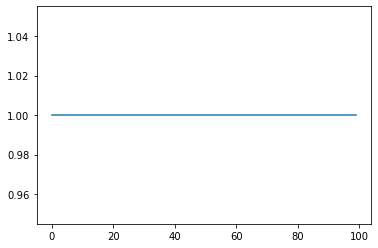

In [6]:
if __name__ == '__main__':
    world = LineWorld(10, 1, 9, 0)
    scores = dqn(world, episodes = 100)
    plt.plot(scores)